In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

In [4]:
df_enem = pd.read_csv("data/enem.csv", encoding='latin-1', sep=";")

# Questão 1 <br>
## Qual é a relação entre a renda familiar declarada pelos participantes e sua nota média na prova?

=== DADOS LIMPOS ===
         count        mean        std      min         25%         50%  \
Q006                                                                     
A     202114.0  482.050793  50.919738    0.000  441.475000  509.820733   
B     932838.0  488.717062  50.861744    0.000  451.450000  512.341206   
C     575943.0  501.359060  52.558909    0.000  469.325000  512.341206   
D     432478.0  508.602861  55.912146    0.000  476.550000  512.341206   
E     209943.0  517.065414  60.143358    0.000  483.900000  512.341206   
F     233353.0  522.914340  62.833487    0.000  488.200000  512.341206   
G     195709.0  532.922801  67.009999    0.000  496.625000  512.341206   
H     151384.0  541.791239  70.400905  195.475  503.400000  522.025000   
I      93898.0  548.929580  72.695577  128.050  509.725000  533.150000   
J      57492.0  555.213303  73.749638  190.075  512.341206  542.825000   
K      45090.0  558.919101  75.163715  228.775  512.341206  548.225000   
L      39388.0  5

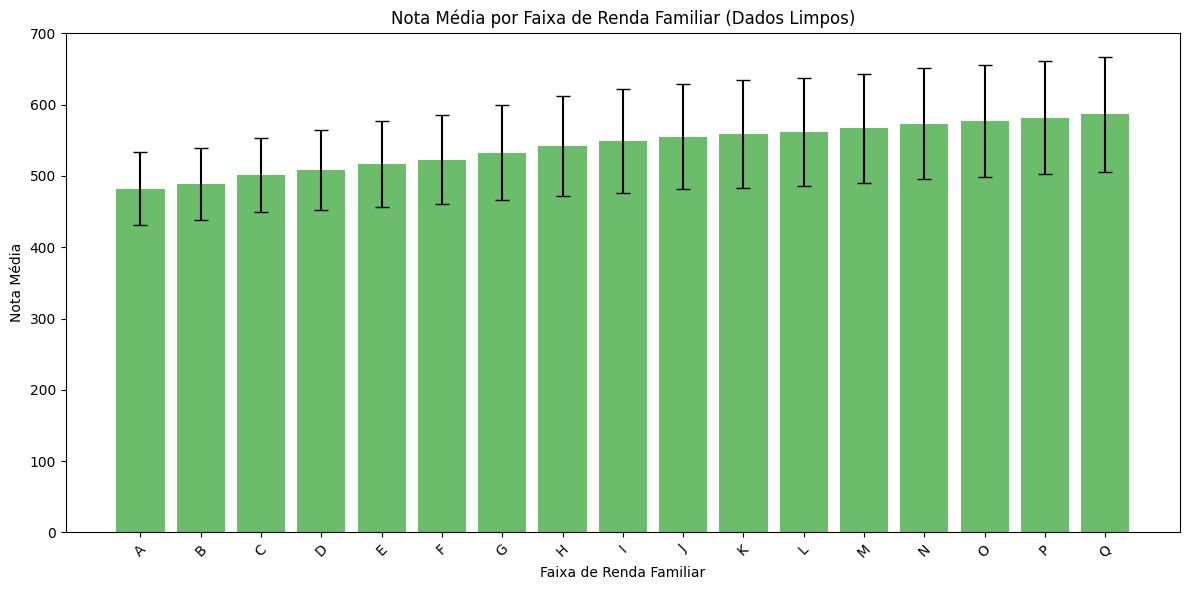

<Figure size 1200x600 with 0 Axes>

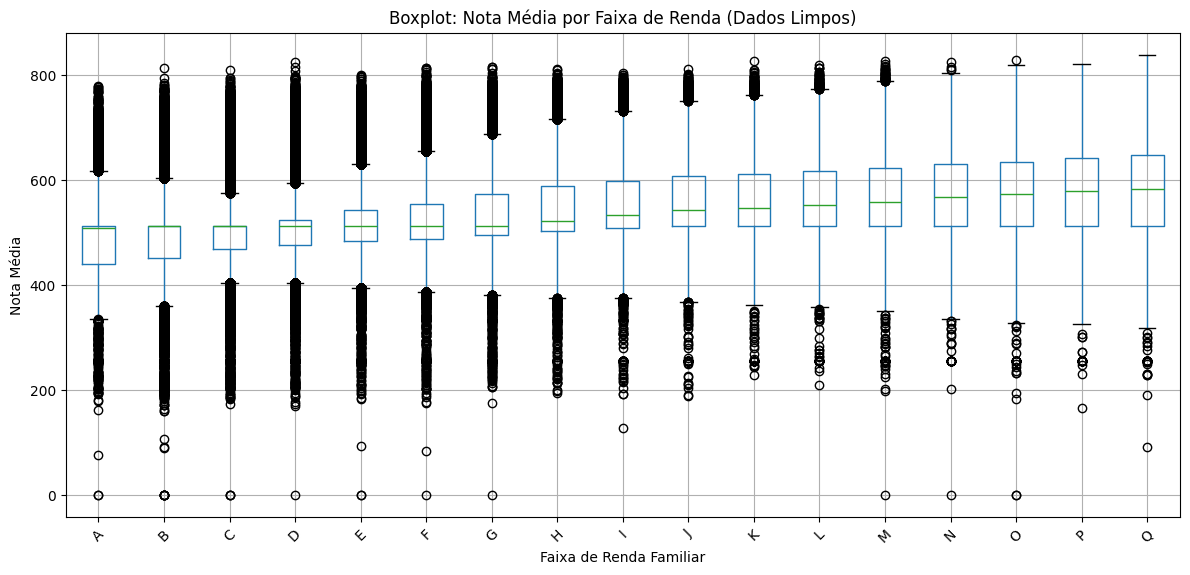

In [5]:
df_enem_clean = df_enem.copy()

# Limpar dados - imputar valores nulos com média
processor = SimpleImputer(strategy="mean")
colunas_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]
df_enem_clean[colunas_notas] = processor.fit_transform(df_enem[colunas_notas])

# Calcular nota média das provas objetivas
df_enem['NU_MEDIA'] = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)
df_enem_clean['NU_MEDIA'] = df_enem_clean[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)

# Filtrar dados com renda válida
df_renda = df_enem[df_enem['Q006'].notna()].copy()
df_renda_clean = df_enem_clean[df_enem_clean['Q006'].notna()].copy()

# Tabela describe() - Dados Limpos
print('=== DADOS LIMPOS ===')
print(df_renda_clean.groupby('Q006')['NU_MEDIA'].describe())

# Calcular médias e desvios padrão
medias_renda = df_renda.groupby('Q006')['NU_MEDIA'].mean()
stds_renda = df_renda.groupby('Q006')['NU_MEDIA'].std()
medias_renda_clean = df_renda_clean.groupby('Q006')['NU_MEDIA'].mean()
stds_renda_clean = df_renda_clean.groupby('Q006')['NU_MEDIA'].std()

# Gráfico de médias com desvio padrão - Dados Limpos
plt.figure(figsize=(12, 6))
plt.bar(medias_renda_clean.index, medias_renda_clean.values, yerr=stds_renda_clean.values, capsize=5, color='#2ca02c', alpha=0.7)
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Nota Média')
plt.title('Nota Média por Faixa de Renda Familiar (Dados Limpos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot - Dados Limpos
plt.figure(figsize=(12, 6))
df_renda_clean.boxplot(column='NU_MEDIA', by='Q006', figsize=(12, 6))
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Nota Média')
plt.title('Boxplot: Nota Média por Faixa de Renda (Dados Limpos)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Questão 2 <br>
## Existe uma diferença no desempenho geral no ENEM entre os estudantes que cursam o ensino médio em escolas públicas e privadas?

C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\260017402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escola_publica['NU_MEDIA'] = df_escola_publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\260017402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escola_publica['NU_MEDIA_GEOMETRICA'] = df_escola_publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].prod(axis=

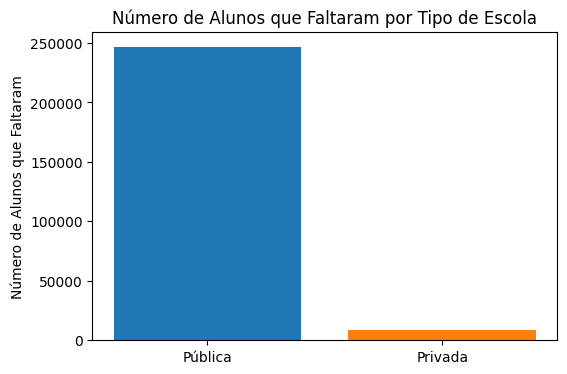

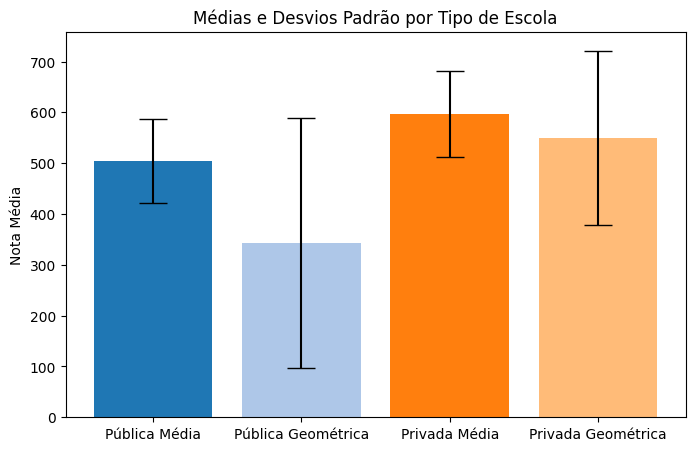

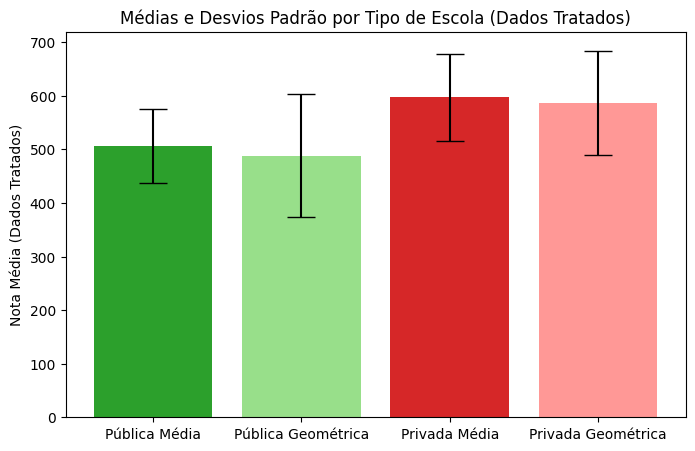

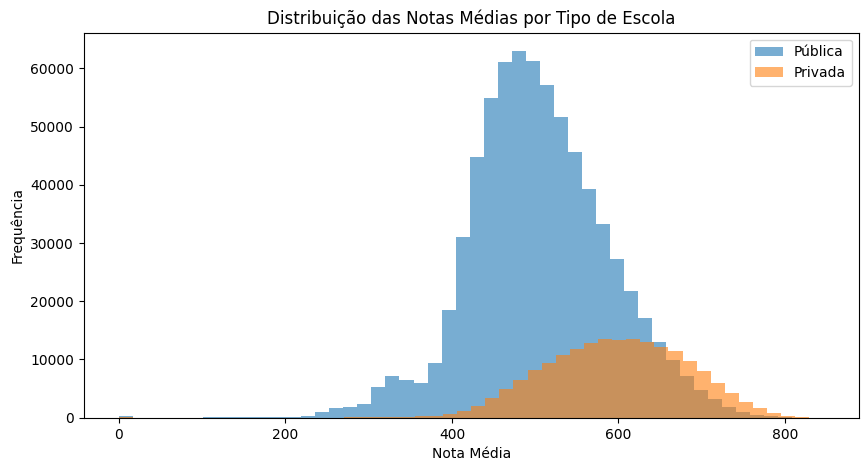

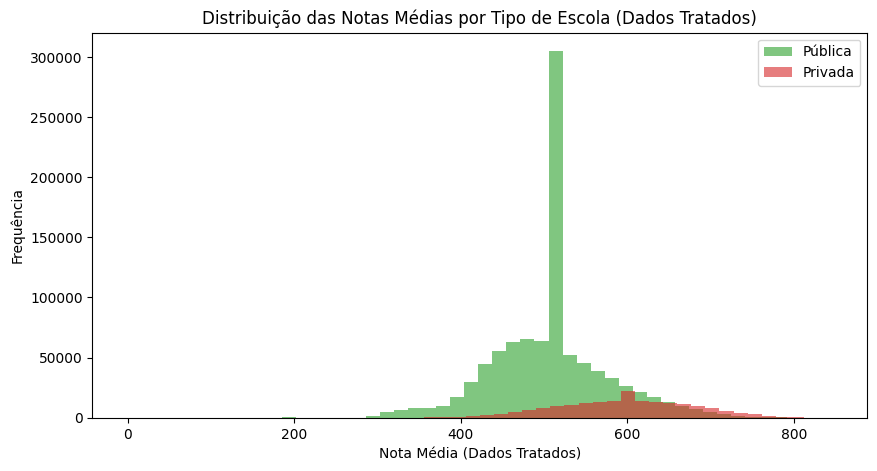

C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\260017402.py:191: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


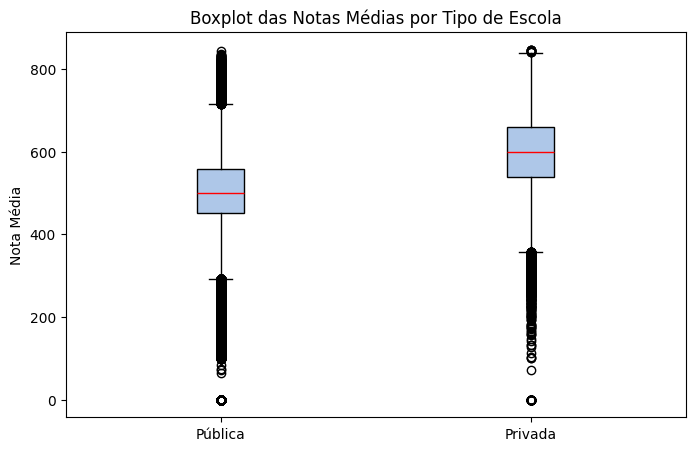

C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\260017402.py:204: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\260017402.py:215: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


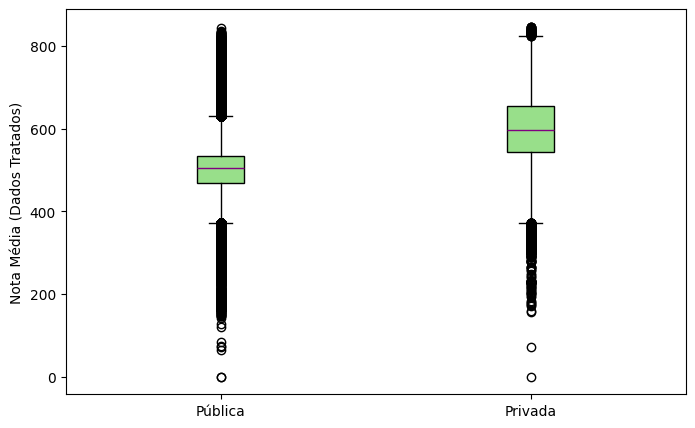

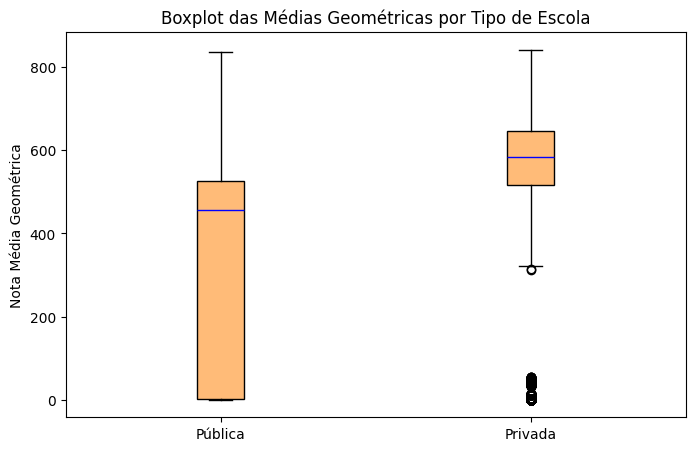

C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\260017402.py:228: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


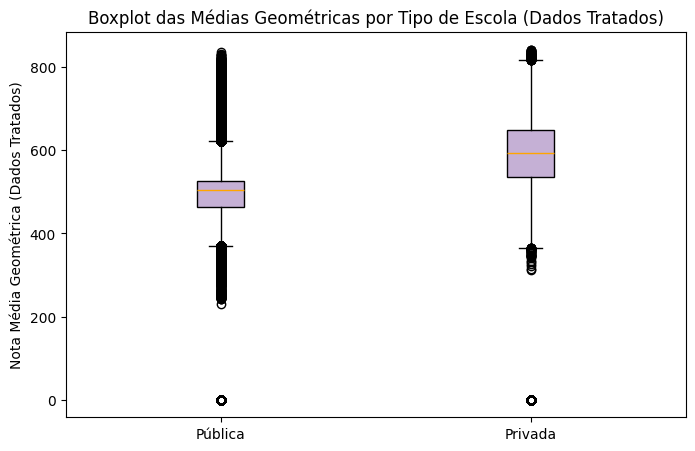

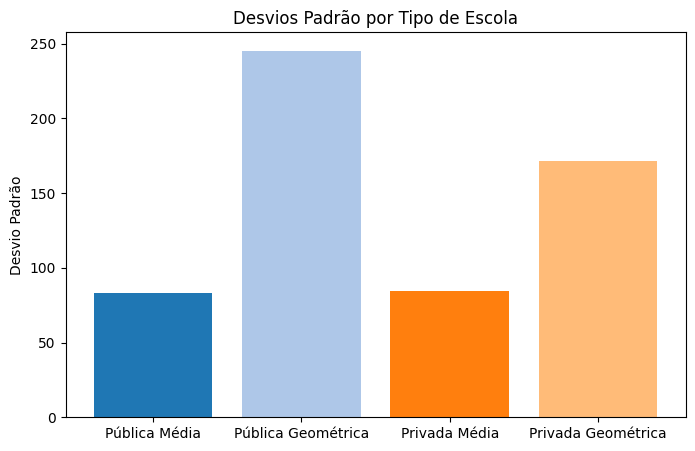

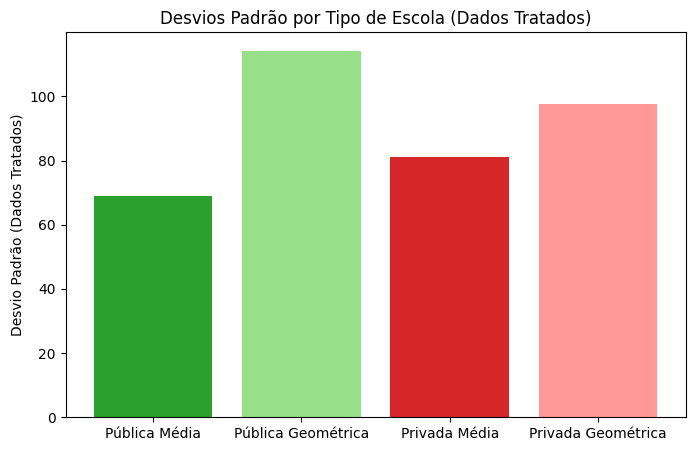

In [5]:
df_escola_publica = df_enem[df_enem["TP_ESCOLA"] == 2]
df_escola_privada = df_enem[df_enem["TP_ESCOLA"] == 3]
df_escola_publica_clean = df_escola_publica.copy()
df_escola_privada_clean = df_escola_privada.copy()

df_escola_publica['NU_MEDIA'] = df_escola_publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
df_escola_publica['NU_MEDIA_GEOMETRICA'] = df_escola_publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].prod(axis=1)**(1/5)
df_escola_privada['NU_MEDIA'] = df_escola_privada[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
df_escola_privada['NU_MEDIA_GEOMETRICA'] = df_escola_privada[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].prod(axis=1)**(1/5)

# Tratando valores nulos com base na média
processor = SimpleImputer(strategy="mean")
ct = make_column_transformer((processor, [
        "NU_NOTA_CN",
        "NU_NOTA_CH",
        "NU_NOTA_LC",
        "NU_NOTA_MT",
        "NU_NOTA_COMP1",
        "NU_NOTA_COMP2",
        "NU_NOTA_COMP3",
        "NU_NOTA_COMP4",
        "NU_NOTA_COMP5",
        "NU_NOTA_REDACAO"
    ]
), remainder="passthrough")

df_escola_publica_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_escola_publica[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])

df_escola_privada_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_escola_privada[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])

df_escola_publica_clean['NU_MEDIA'] = df_escola_publica_clean[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
df_escola_publica_clean['NU_MEDIA_GEOMETRICA'] = df_escola_publica_clean[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].prod(axis=1)**(1/5)

df_escola_privada_clean['NU_MEDIA'] = df_escola_privada_clean[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
df_escola_privada_clean['NU_MEDIA_GEOMETRICA'] = df_escola_privada_clean[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].prod(axis=1)**(1/5)

# Primeiramente vamos pegar quantos alunos de escola pública e privada faltaram a prova
faltaram_publica = df_escola_publica[
    df_escola_publica[
        [
            "NU_NOTA_CN",
            "NU_NOTA_CH",
            "NU_NOTA_LC",
            "NU_NOTA_MT",
            "NU_NOTA_COMP1",
            "NU_NOTA_COMP2",
            "NU_NOTA_COMP3",
            "NU_NOTA_COMP4",
            "NU_NOTA_COMP5",
            "NU_NOTA_REDACAO"
        ]
    ].isnull().all(axis=1)
].shape[0]

faltaram_privada = df_escola_privada[
    df_escola_privada[
        [
            "NU_NOTA_CN",
            "NU_NOTA_CH",
            "NU_NOTA_LC",
            "NU_NOTA_MT",
            "NU_NOTA_COMP1",
            "NU_NOTA_COMP2",
            "NU_NOTA_COMP3",
            "NU_NOTA_COMP4",
            "NU_NOTA_COMP5",
            "NU_NOTA_REDACAO"
        ]
    ].isnull().all(axis=1)
].shape[0]

plt.figure(figsize=(6, 4))
plt.bar(['Pública', 'Privada'], [faltaram_publica, faltaram_privada], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Número de Alunos que Faltaram')
plt.title('Número de Alunos que Faltaram por Tipo de Escola')
plt.show()

medias = [
    df_escola_publica['NU_MEDIA'].mean(),
    df_escola_publica['NU_MEDIA_GEOMETRICA'].mean(),
    df_escola_privada['NU_MEDIA'].mean(),
    df_escola_privada['NU_MEDIA_GEOMETRICA'].mean()
]

medias_clean = [
    df_escola_publica_clean['NU_MEDIA'].mean(),
    df_escola_publica_clean['NU_MEDIA_GEOMETRICA'].mean(),
    df_escola_privada_clean['NU_MEDIA'].mean(),
    df_escola_privada_clean['NU_MEDIA_GEOMETRICA'].mean()
]

stds = [
    df_escola_publica['NU_MEDIA'].std(),
    df_escola_publica['NU_MEDIA_GEOMETRICA'].std(),
    df_escola_privada['NU_MEDIA'].std(),
    df_escola_privada['NU_MEDIA_GEOMETRICA'].std()
]

stds_clean = [
    df_escola_publica_clean['NU_MEDIA'].std(),
    df_escola_publica_clean['NU_MEDIA_GEOMETRICA'].std(),
    df_escola_privada_clean['NU_MEDIA'].std(),
    df_escola_privada_clean['NU_MEDIA_GEOMETRICA'].std()
]

labels = [
    'Pública Média',
    'Pública Geométrica',
    'Privada Média',
    'Privada Geométrica'
]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, medias, yerr=stds, capsize=10, color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])
plt.ylabel('Nota Média')
plt.title('Médias e Desvios Padrão por Tipo de Escola')
plt.show()

plt.figure(figsize=(8, 5))
bars_clean = plt.bar(labels, medias_clean, yerr=stds_clean, capsize=10, color=['#2ca02c', '#98df8a', '#d62728', '#ff9896'])
plt.ylabel('Nota Média (Dados Tratados)')
plt.title('Médias e Desvios Padrão por Tipo de Escola (Dados Tratados)')
plt.show()

# Distribuição das médias
plt.figure(figsize=(10, 5))
plt.hist(df_escola_publica['NU_MEDIA'].dropna(), bins=50, alpha=0.6, label='Pública', color='#1f77b4')
plt.hist(df_escola_privada['NU_MEDIA'].dropna(), bins=50, alpha=0.6, label='Privada', color='#ff7f0e')
plt.xlabel('Nota Média')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas Médias por Tipo de Escola')
plt.legend()
plt.show()

# Distribuição das médias com o dado limpo
plt.figure(figsize=(10, 5))
plt.hist(df_escola_publica_clean['NU_MEDIA'].dropna(), bins=50, alpha=0.6, label='Pública', color='#2ca02c')
plt.hist(df_escola_privada_clean['NU_MEDIA'].dropna(), bins=50, alpha=0.6, label='Privada', color='#d62728')
plt.xlabel('Nota Média (Dados Tratados)')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas Médias por Tipo de Escola (Dados Tratados)')
plt.legend()
plt.show()

# Boxplot das médias
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_escola_publica['NU_MEDIA'].dropna(), df_escola_privada['NU_MEDIA'].dropna()],
    labels=['Pública', 'Privada'],
    patch_artist=True,
    boxprops=dict(facecolor='#aec7e8'),
    medianprops=dict(color='red')
)
plt.ylabel('Nota Média')
plt.title('Boxplot das Notas Médias por Tipo de Escola')
plt.show()

# Boxplot das médias com o dado limpo
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_escola_publica_clean['NU_MEDIA'].dropna(), df_escola_privada_clean['NU_MEDIA'].dropna()],
    labels=['Pública', 'Privada'],
    patch_artist=True,
    boxprops=dict(facecolor='#98df8a'),
    medianprops=dict(color='purple')
)
plt.ylabel('Nota Média (Dados Tratados)')

# Boxplot das médias geométricas
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_escola_publica['NU_MEDIA_GEOMETRICA'].dropna(), df_escola_privada['NU_MEDIA_GEOMETRICA'].dropna()],
    labels=['Pública', 'Privada'],
    patch_artist=True,
    boxprops=dict(facecolor='#ffbb78'),
    medianprops=dict(color='blue')
)
plt.ylabel('Nota Média Geométrica')
plt.title('Boxplot das Médias Geométricas por Tipo de Escola')
plt.show()

# Boxplot das médias geométricas com o dado limpo
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_escola_publica_clean['NU_MEDIA_GEOMETRICA'].dropna(), df_escola_privada_clean['NU_MEDIA_GEOMETRICA'].dropna()],
    labels=['Pública', 'Privada'],
    patch_artist=True,
    boxprops=dict(facecolor='#c5b0d5'),
    medianprops=dict(color='orange')
)
plt.ylabel('Nota Média Geométrica (Dados Tratados)')
plt.title('Boxplot das Médias Geométricas por Tipo de Escola (Dados Tratados)')

# Plot dos desvios padrão
plt.figure(figsize=(8, 5))
plt.bar(labels, stds, color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])
plt.ylabel('Desvio Padrão')
plt.title('Desvios Padrão por Tipo de Escola')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(labels, stds_clean, color=['#2ca02c', '#98df8a', '#d62728', '#ff9896'])
plt.ylabel('Desvio Padrão (Dados Tratados)')
plt.title('Desvios Padrão por Tipo de Escola (Dados Tratados)')
plt.show()


# Questão 3 <br>
## Qual é a distribuição de desempenho nas provas objetivas por regiões geográficas do Brasil?

=== DADOS LIMPOS ===
                  count        mean        std    min      25%         50%  \
REGIAO                                                                       
Centro-Oeste   302991.0  511.639720  63.455237    0.0  474.450  512.341206   
Nordeste      1181403.0  501.335702  63.045395    0.0  457.800  512.341206   
Norte          389596.0  493.965680  55.595642    0.0  454.950  512.341206   
Sudeste       1140311.0  526.941349  66.285455    0.0  494.125  512.341206   
Sul            375531.0  522.259984  64.005327  178.5  488.875  512.341206   

                     75%      max  
REGIAO                             
Centro-Oeste  527.200000  821.050  
Nordeste      514.066465  825.575  
Norte         512.341206  799.750  
Sudeste       559.150000  839.150  
Sul           550.275000  827.800  


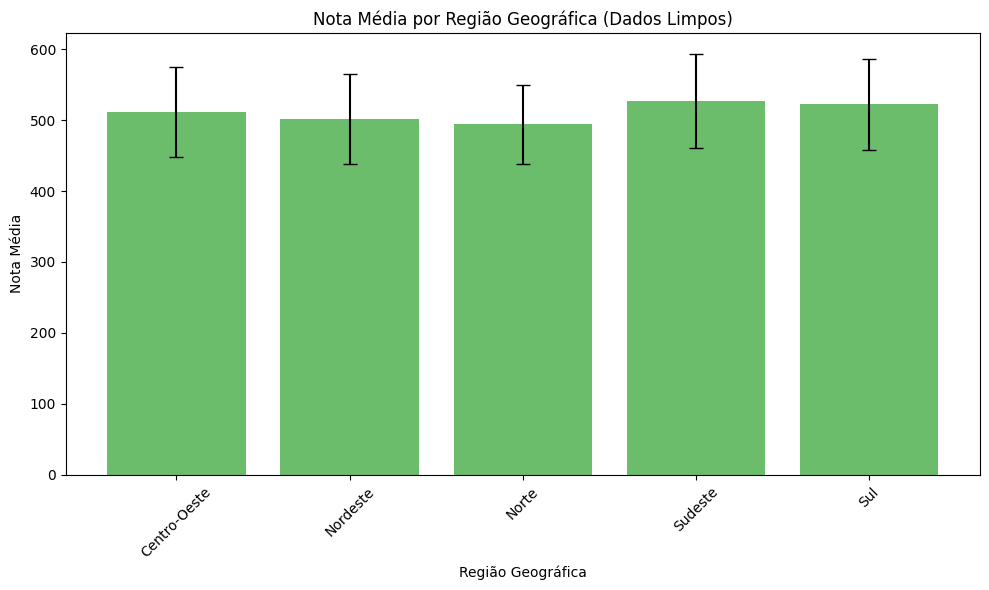

<Figure size 1000x600 with 0 Axes>

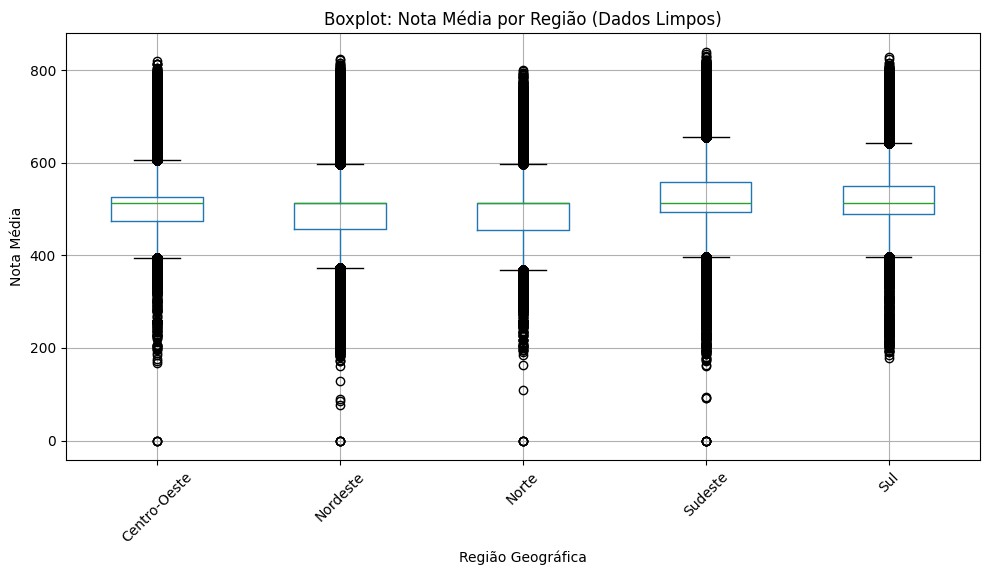

In [6]:
df_enem_clean = df_enem.copy()

# Limpar dados - imputar valores nulos com média
processor = SimpleImputer(strategy="mean")
colunas_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]
df_enem_clean[colunas_notas] = processor.fit_transform(df_enem[colunas_notas])

# Criar coluna da região baseada no primeiro dígito do código do município
df_enem['REGIAO_COD'] = df_enem['CO_MUNICIPIO_PROVA'].astype(str).str[0]
df_enem_clean['REGIAO_COD'] = df_enem_clean['CO_MUNICIPIO_PROVA'].astype(str).str[0]

# Mapear códigos das regiões para nomes
mapeamento_regioes = {
    '1': 'Norte',
    '2': 'Nordeste',
    '3': 'Sudeste',
    '4': 'Sul',
    '5': 'Centro-Oeste'
}

df_enem['REGIAO'] = df_enem['REGIAO_COD'].map(mapeamento_regioes)
df_enem_clean['REGIAO'] = df_enem_clean['REGIAO_COD'].map(mapeamento_regioes)

# Calcular média geral das provas objetivas
df_enem['MEDIA_GERAL'] = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)
df_enem_clean['MEDIA_GERAL'] = df_enem_clean[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)

# Filtrar dados com região válida
df_regiao = df_enem[df_enem['REGIAO'].notna()].copy()
df_regiao_clean = df_enem_clean[df_enem_clean['REGIAO'].notna()].copy()

# Tabela describe() - Dados Limpos
print('=== DADOS LIMPOS ===')
print(df_regiao_clean.groupby('REGIAO')['MEDIA_GERAL'].describe())

# Calcular médias e desvios padrão
medias_regiao = df_regiao.groupby('REGIAO')['MEDIA_GERAL'].mean()
stds_regiao = df_regiao.groupby('REGIAO')['MEDIA_GERAL'].std()
medias_regiao_clean = df_regiao_clean.groupby('REGIAO')['MEDIA_GERAL'].mean()
stds_regiao_clean = df_regiao_clean.groupby('REGIAO')['MEDIA_GERAL'].std()

# Gráfico de médias com desvio padrão - Dados Limpos
plt.figure(figsize=(10, 6))
plt.bar(medias_regiao_clean.index, medias_regiao_clean.values, yerr=stds_regiao_clean.values, capsize=5, color='#2ca02c', alpha=0.7)
plt.xlabel('Região Geográfica')
plt.ylabel('Nota Média')
plt.title('Nota Média por Região Geográfica (Dados Limpos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot - Dados Limpos
plt.figure(figsize=(10, 6))
df_regiao_clean.boxplot(column='MEDIA_GERAL', by='REGIAO', figsize=(10, 6))
plt.xlabel('Região Geográfica')
plt.ylabel('Nota Média')
plt.title('Boxplot: Nota Média por Região (Dados Limpos)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Questão 4 <br>

## Existe uma correlação entre as notas obtidas na prova de redação e as notas da prova de linguagens e códigos?

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:307: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


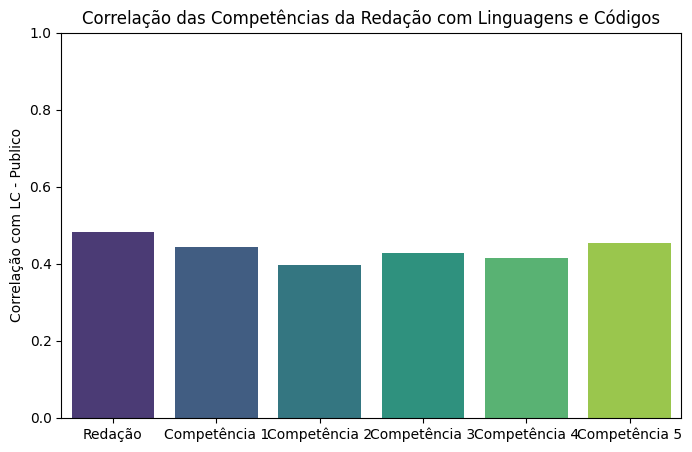

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:319: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


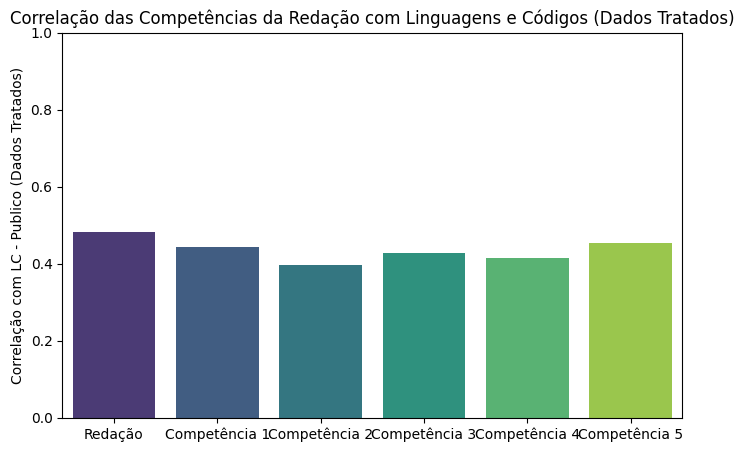

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:331: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


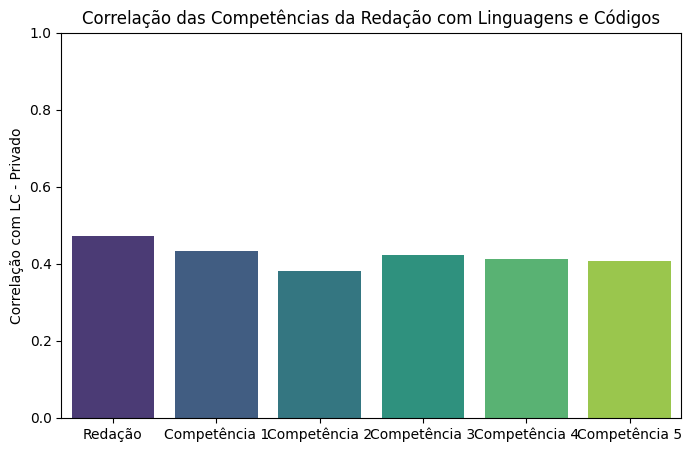

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:343: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


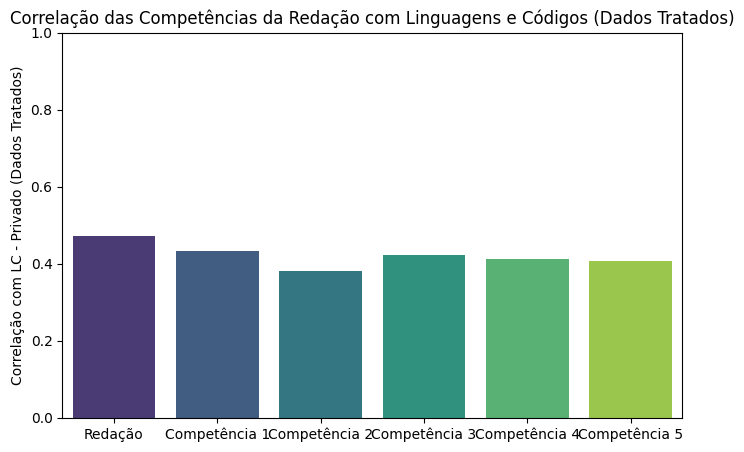

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:355: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


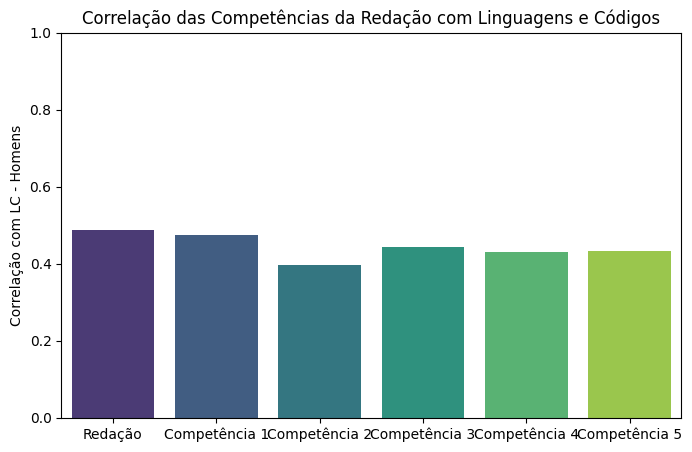

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:367: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


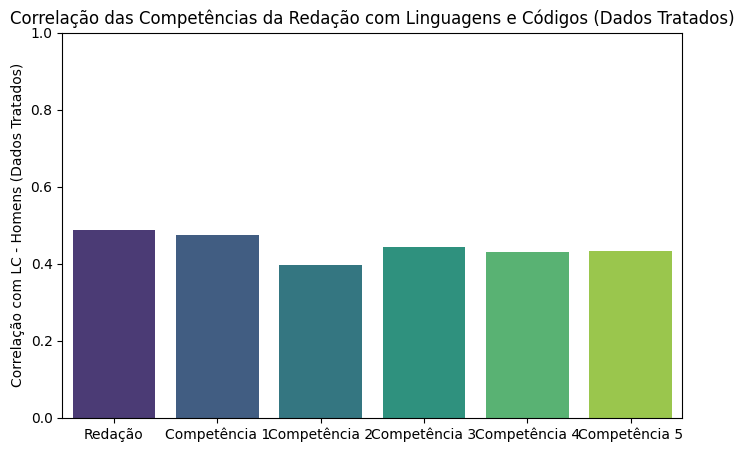

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:379: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


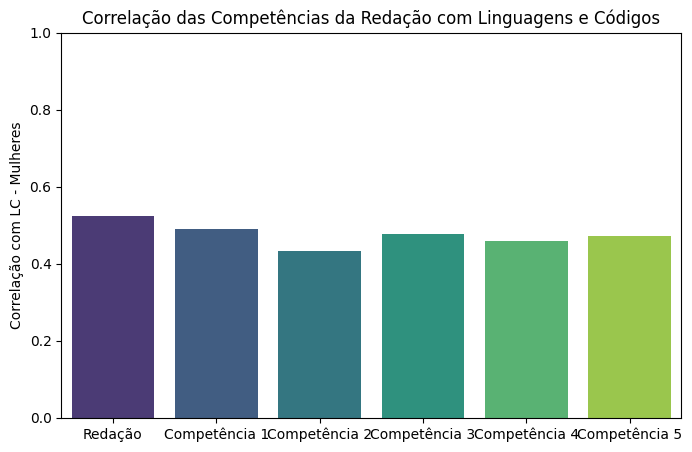

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:391: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


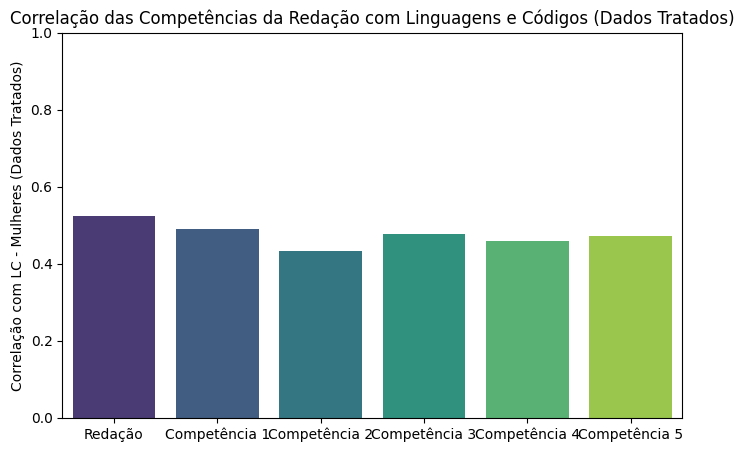

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:403: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


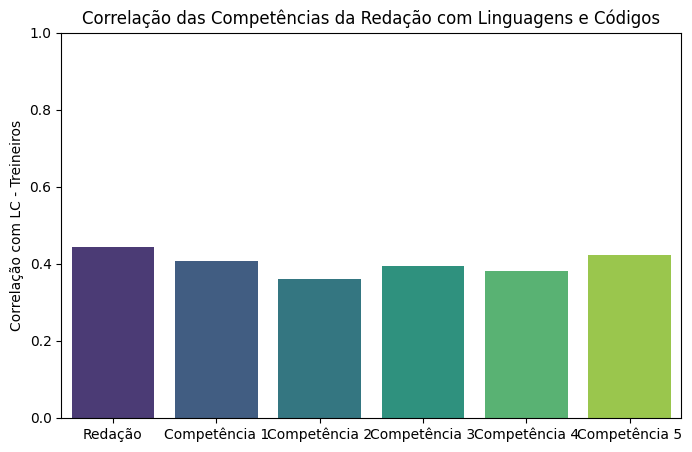

C:\Users\lnata\AppData\Local\Temp\ipykernel_31152\2322881474.py:415: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


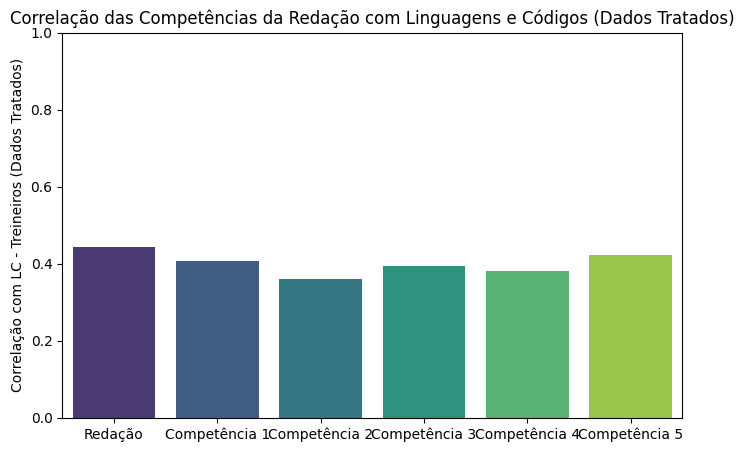

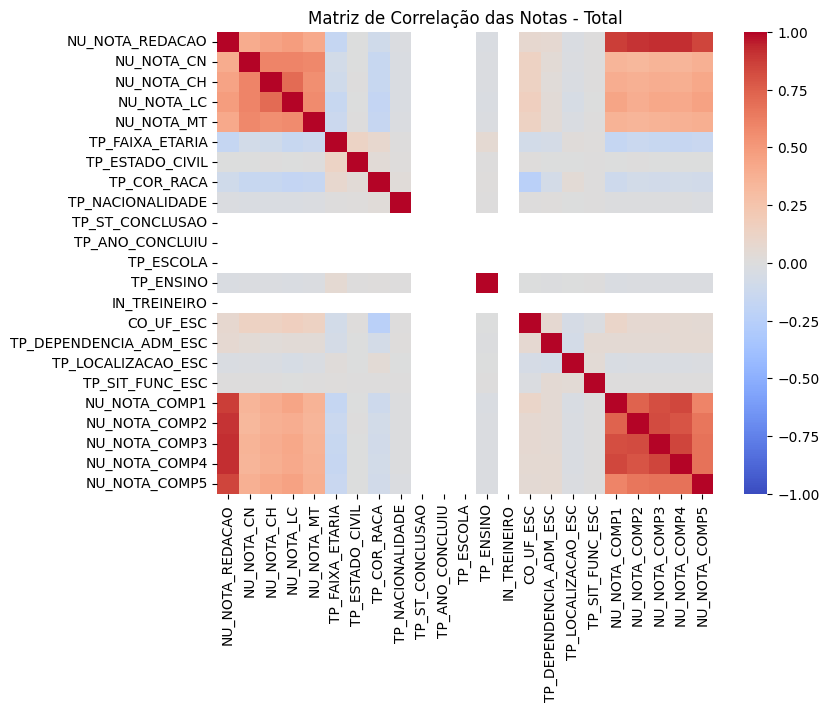

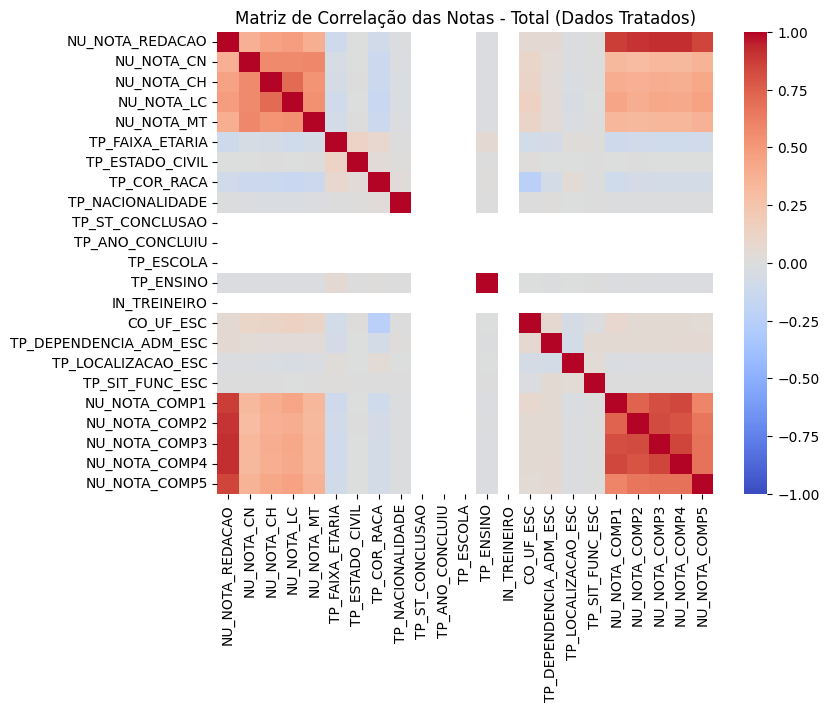

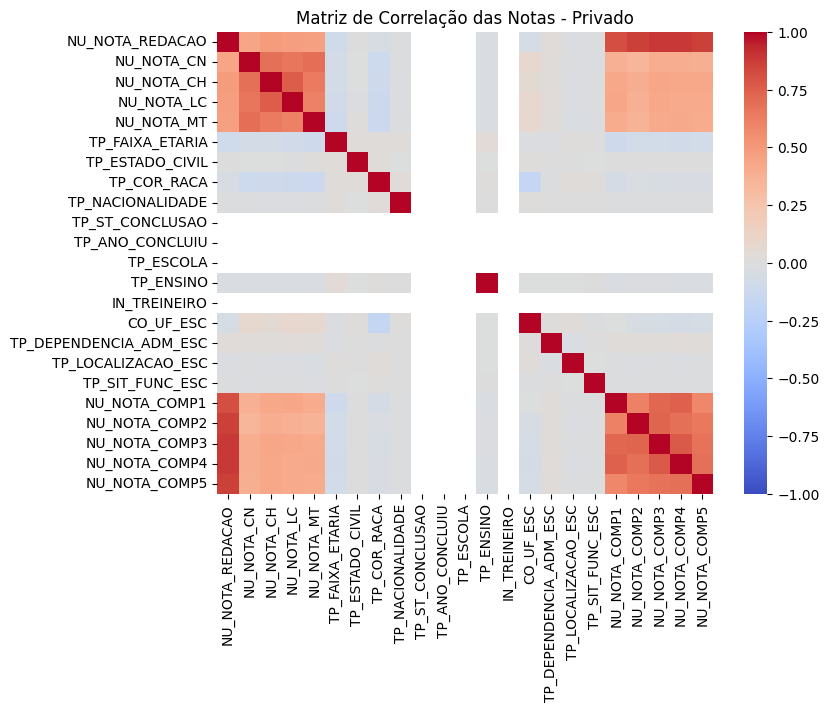

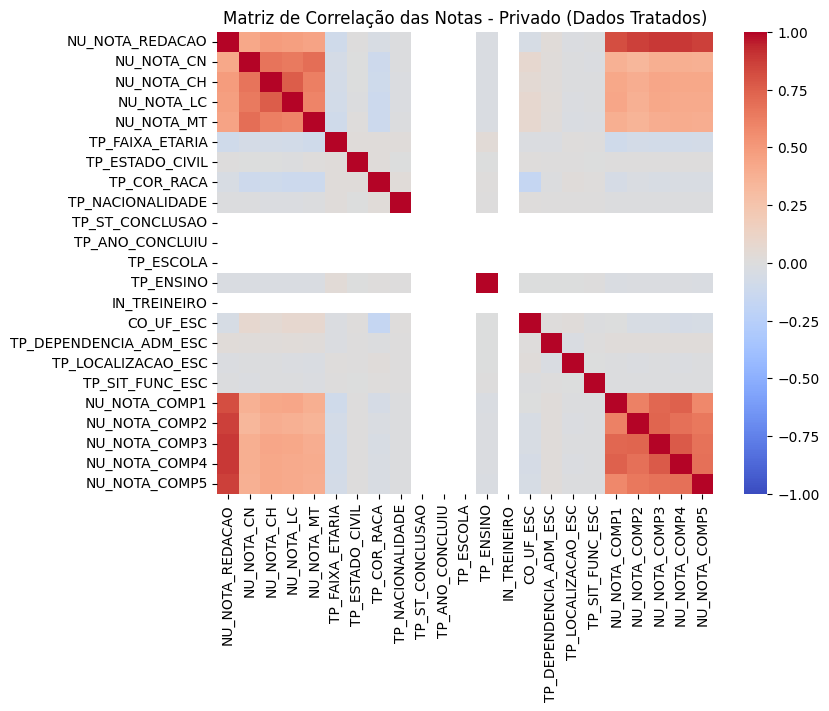

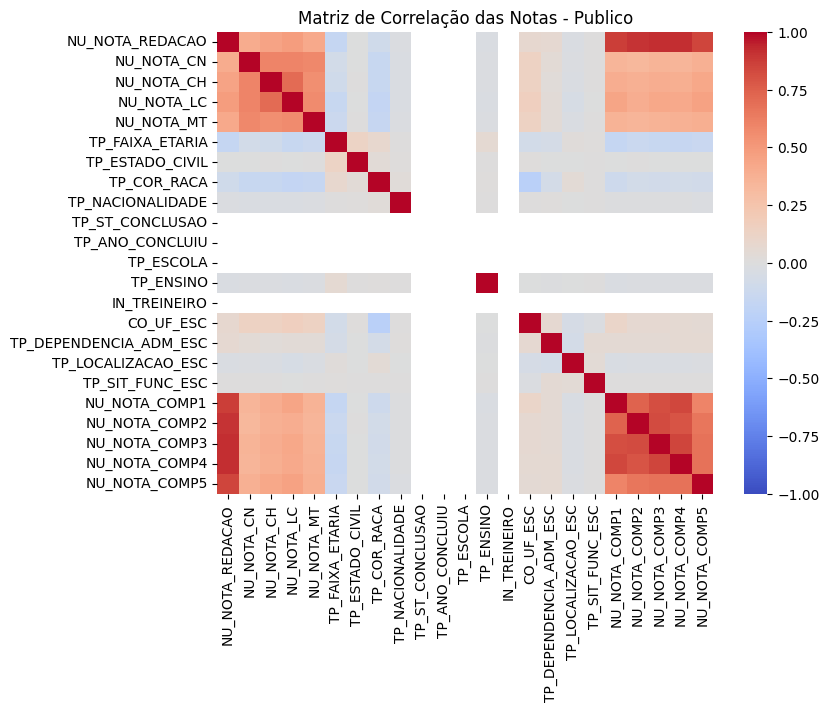

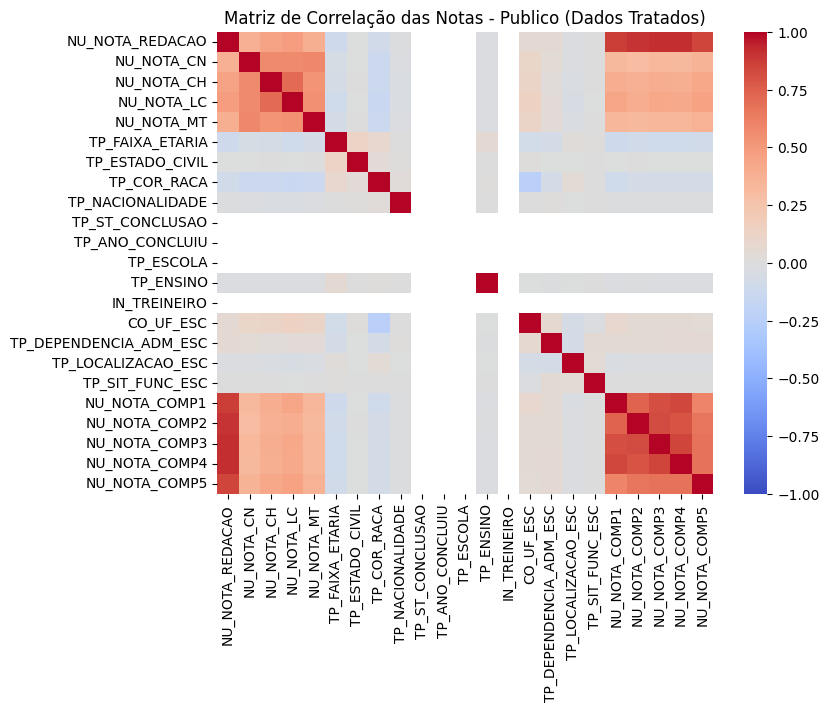

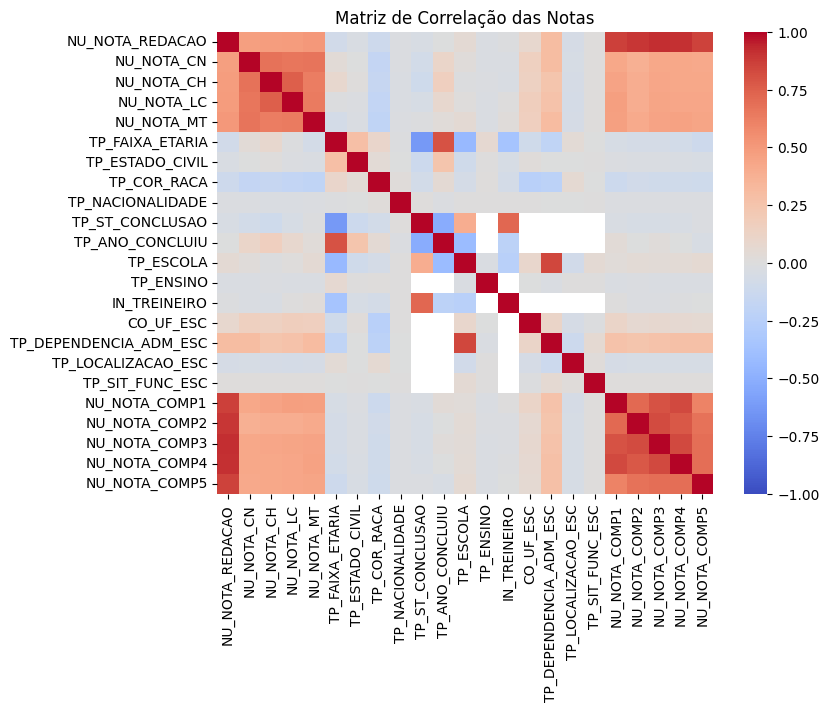

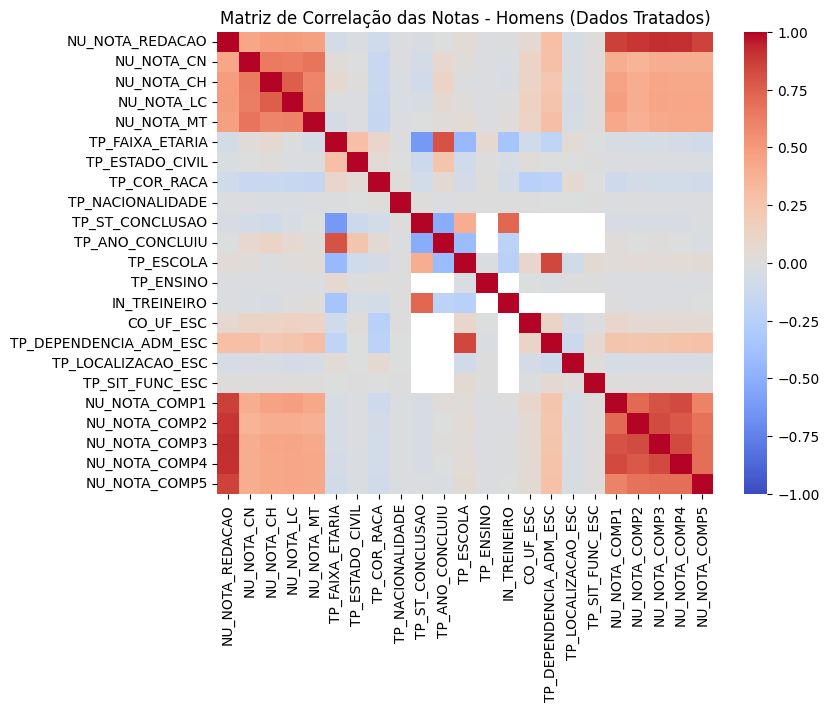

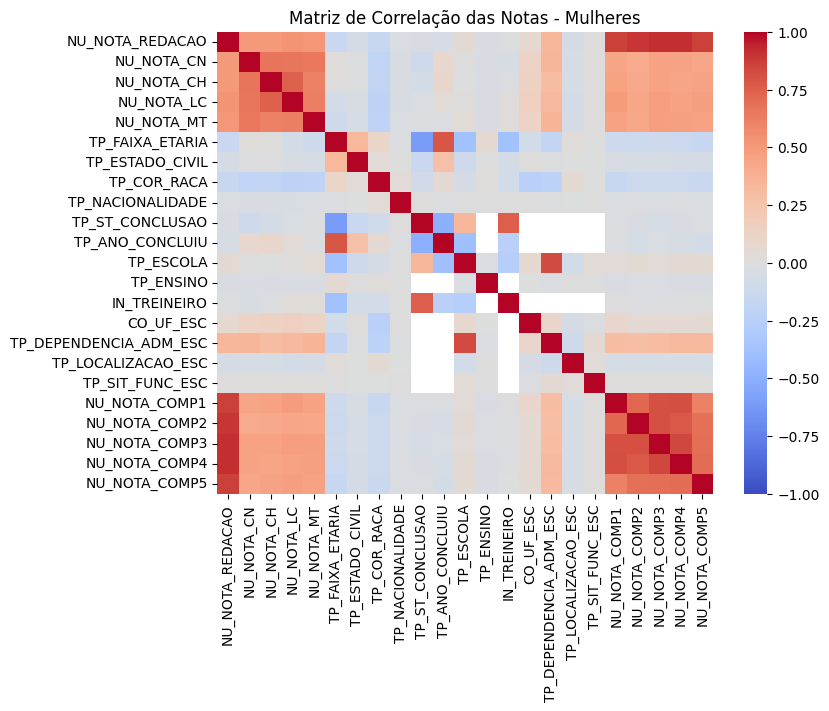

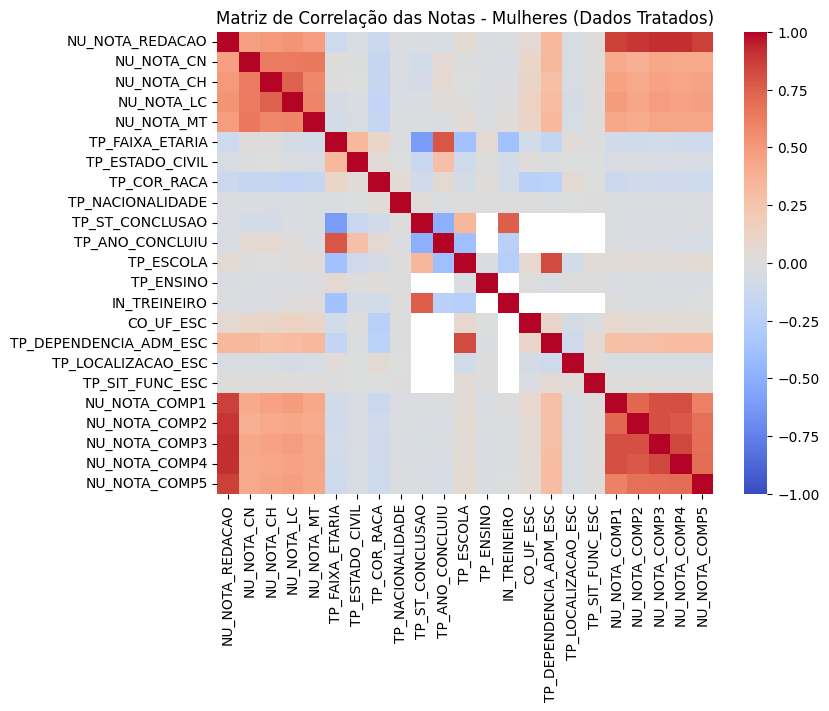

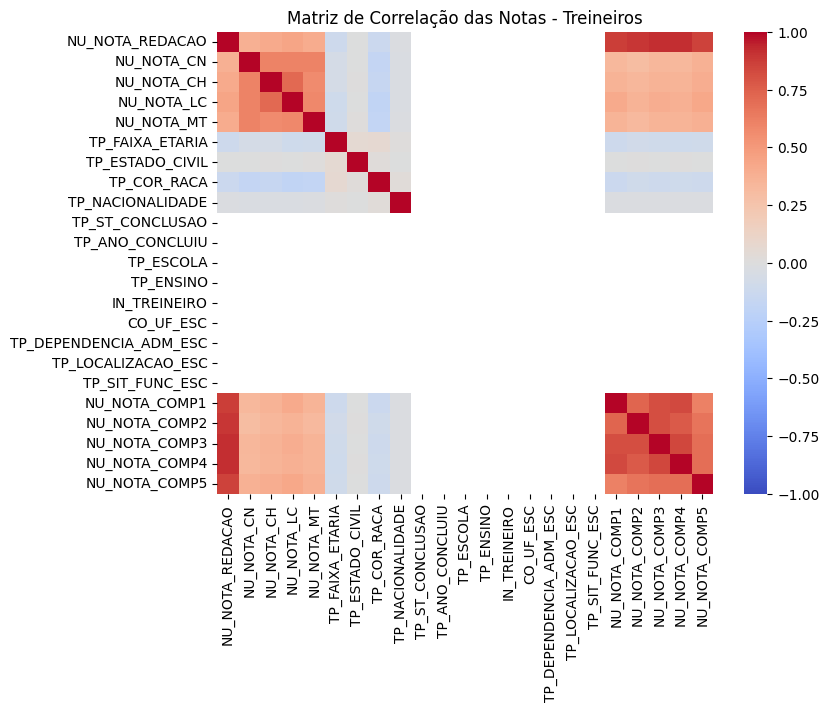

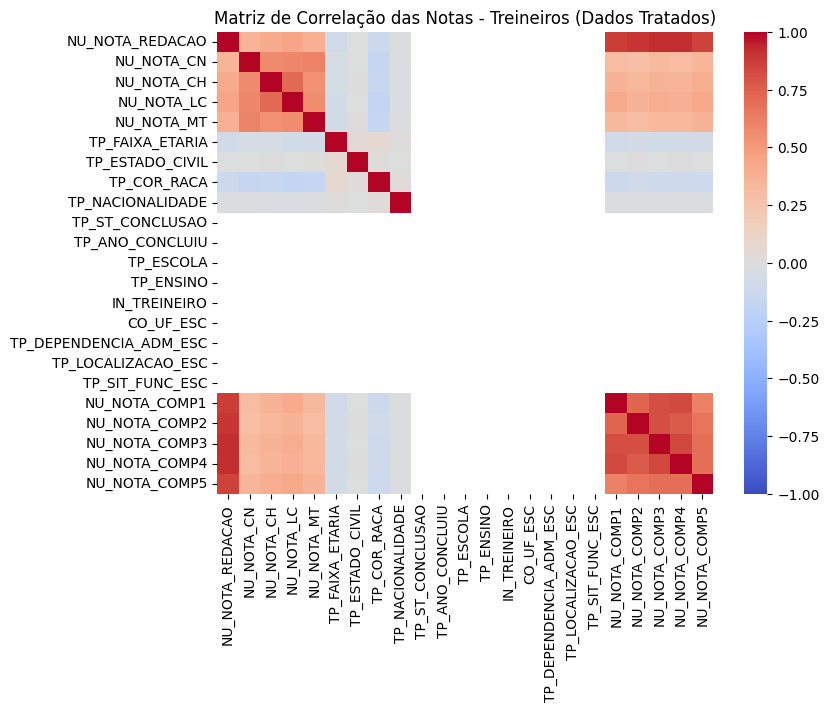

In [ ]:
df_publico = df_enem[df_enem["TP_ESCOLA"] == 2]
df_privado = df_enem[df_enem["TP_ESCOLA"] == 3]
df_homens = df_enem[df_enem["TP_SEXO"] == "M"]
df_mulheres = df_enem[df_enem["TP_SEXO"] == "F"]
df_treineiro = df_enem[df_enem["IN_TREINEIRO"] == 1 ]

df_publico_clean = df_publico.copy()
df_privado_clean = df_privado.copy()
df_homens_clean = df_homens.copy()
df_mulheres_clean = df_mulheres.copy()
df_treineiro_clean = df_treineiro.copy()

processor = SimpleImputer(strategy='mean')
ct = make_column_transformer(
    (processor, ['NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']),
    remainder='passthrough'
)

df_publico_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_publico[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])

df_privado_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_privado[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])

df_homens_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_homens[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])

df_mulheres_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_mulheres[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])

df_treineiro_clean[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]] = processor.fit_transform(df_treineiro[[
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO"
]])


# Correlação publica
correlacao_total_publico = df_publico['NU_NOTA_REDACAO'].corr(df_publico['NU_NOTA_LC'])
correlacao_competencia_1_publico = df_publico['NU_NOTA_COMP1'].corr(df_publico['NU_NOTA_LC'])
correlacao_competencia_2_publico = df_publico['NU_NOTA_COMP2'].corr(df_publico['NU_NOTA_LC'])
correlacao_competencia_3_publico = df_publico['NU_NOTA_COMP3'].corr(df_publico['NU_NOTA_LC'])
correlacao_competencia_4_publico = df_publico['NU_NOTA_COMP4'].corr(df_publico['NU_NOTA_LC'])
correlacao_competencia_5_publico = df_publico['NU_NOTA_COMP5'].corr(df_publico['NU_NOTA_LC'])

correlacao_total_clean_publico = df_publico_clean['NU_NOTA_REDACAO'].corr(df_publico_clean['NU_NOTA_LC'])
correlacao_competencia_1_clean_publico = df_publico_clean['NU_NOTA_COMP1'].corr(df_publico_clean['NU_NOTA_LC'])
correlacao_competencia_2_clean_publico = df_publico_clean['NU_NOTA_COMP2'].corr(df_publico_clean['NU_NOTA_LC'])
correlacao_competencia_3_clean_publico = df_publico_clean['NU_NOTA_COMP3'].corr(df_publico_clean['NU_NOTA_LC'])
correlacao_competencia_4_clean_publico = df_publico_clean['NU_NOTA_COMP4'].corr(df_publico_clean['NU_NOTA_LC'])
correlacao_competencia_5_clean_publico = df_publico_clean['NU_NOTA_COMP5'].corr(df_publico_clean['NU_NOTA_LC'])

# Correlação privado
correlacao_total_privado = df_privado['NU_NOTA_REDACAO'].corr(df_privado['NU_NOTA_LC'])
correlacao_competencia_1_privado = df_privado['NU_NOTA_COMP1'].corr(df_privado['NU_NOTA_LC'])
correlacao_competencia_2_privado = df_privado['NU_NOTA_COMP2'].corr(df_privado['NU_NOTA_LC'])
correlacao_competencia_3_privado = df_privado['NU_NOTA_COMP3'].corr(df_privado['NU_NOTA_LC'])
correlacao_competencia_4_privado = df_privado['NU_NOTA_COMP4'].corr(df_privado['NU_NOTA_LC'])
correlacao_competencia_5_privado = df_privado['NU_NOTA_COMP5'].corr(df_privado['NU_NOTA_LC'])

correlacao_total_clean_privado = df_privado_clean['NU_NOTA_REDACAO'].corr(df_privado_clean['NU_NOTA_LC'])
correlacao_competencia_1_clean_privado = df_privado_clean['NU_NOTA_COMP1'].corr(df_privado_clean['NU_NOTA_LC'])
correlacao_competencia_2_clean_privado = df_privado_clean['NU_NOTA_COMP2'].corr(df_privado_clean['NU_NOTA_LC'])
correlacao_competencia_3_clean_privado = df_privado_clean['NU_NOTA_COMP3'].corr(df_privado_clean['NU_NOTA_LC'])
correlacao_competencia_4_clean_privado = df_privado_clean['NU_NOTA_COMP4'].corr(df_privado_clean['NU_NOTA_LC'])
correlacao_competencia_5_clean_privado = df_privado_clean['NU_NOTA_COMP5'].corr(df_privado_clean['NU_NOTA_LC'])

# Correlação homens
correlacao_total_homens = df_homens['NU_NOTA_REDACAO'].corr(df_homens['NU_NOTA_LC'])
correlacao_competencia_1_homens = df_homens['NU_NOTA_COMP1'].corr(df_homens['NU_NOTA_LC'])
correlacao_competencia_2_homens = df_homens['NU_NOTA_COMP2'].corr(df_homens['NU_NOTA_LC'])
correlacao_competencia_3_homens = df_homens['NU_NOTA_COMP3'].corr(df_homens['NU_NOTA_LC'])
correlacao_competencia_4_homens = df_homens['NU_NOTA_COMP4'].corr(df_homens['NU_NOTA_LC'])
correlacao_competencia_5_homens = df_homens['NU_NOTA_COMP5'].corr(df_homens['NU_NOTA_LC'])

correlacao_total_clean_homens = df_homens_clean['NU_NOTA_REDACAO'].corr(df_homens_clean['NU_NOTA_LC'])
correlacao_competencia_1_clean_homens = df_homens_clean['NU_NOTA_COMP1'].corr(df_homens_clean['NU_NOTA_LC'])
correlacao_competencia_2_clean_homens = df_homens_clean['NU_NOTA_COMP2'].corr(df_homens_clean['NU_NOTA_LC'])
correlacao_competencia_3_clean_homens = df_homens_clean['NU_NOTA_COMP3'].corr(df_homens_clean['NU_NOTA_LC'])
correlacao_competencia_4_clean_homens = df_homens_clean['NU_NOTA_COMP4'].corr(df_homens_clean['NU_NOTA_LC'])
correlacao_competencia_5_clean_homens = df_homens_clean['NU_NOTA_COMP5'].corr(df_homens_clean['NU_NOTA_LC'])

# Correlação mulheres
correlacao_total_mulheres = df_mulheres['NU_NOTA_REDACAO'].corr(df_mulheres['NU_NOTA_LC'])
correlacao_competencia_1_mulheres = df_mulheres['NU_NOTA_COMP1'].corr(df_mulheres['NU_NOTA_LC'])
correlacao_competencia_2_mulheres = df_mulheres['NU_NOTA_COMP2'].corr(df_mulheres['NU_NOTA_LC'])
correlacao_competencia_3_mulheres = df_mulheres['NU_NOTA_COMP3'].corr(df_mulheres['NU_NOTA_LC'])
correlacao_competencia_4_mulheres = df_mulheres['NU_NOTA_COMP4'].corr(df_mulheres['NU_NOTA_LC'])
correlacao_competencia_5_mulheres = df_mulheres['NU_NOTA_COMP5'].corr(df_mulheres['NU_NOTA_LC'])

correlacao_total_clean_mulheres = df_mulheres_clean['NU_NOTA_REDACAO'].corr(df_mulheres_clean['NU_NOTA_LC'])
correlacao_competencia_1_clean_mulheres = df_mulheres_clean['NU_NOTA_COMP1'].corr(df_mulheres_clean['NU_NOTA_LC'])
correlacao_competencia_2_clean_mulheres = df_mulheres_clean['NU_NOTA_COMP2'].corr(df_mulheres_clean['NU_NOTA_LC'])
correlacao_competencia_3_clean_mulheres = df_mulheres_clean['NU_NOTA_COMP3'].corr(df_mulheres_clean['NU_NOTA_LC'])
correlacao_competencia_4_clean_mulheres = df_mulheres_clean['NU_NOTA_COMP4'].corr(df_mulheres_clean['NU_NOTA_LC'])
correlacao_competencia_5_clean_mulheres = df_mulheres_clean['NU_NOTA_COMP5'].corr(df_mulheres_clean['NU_NOTA_LC'])

# Correlação treineiros
correlacao_total_treineiro = df_treineiro['NU_NOTA_REDACAO'].corr(df_treineiro['NU_NOTA_LC'])
correlacao_competencia_1_treineiro = df_treineiro['NU_NOTA_COMP1'].corr(df_treineiro['NU_NOTA_LC'])
correlacao_competencia_2_treineiro = df_treineiro['NU_NOTA_COMP2'].corr(df_treineiro['NU_NOTA_LC'])
correlacao_competencia_3_treineiro = df_treineiro['NU_NOTA_COMP3'].corr(df_treineiro['NU_NOTA_LC'])
correlacao_competencia_4_treineiro = df_treineiro['NU_NOTA_COMP4'].corr(df_treineiro['NU_NOTA_LC'])
correlacao_competencia_5_treineiro = df_treineiro['NU_NOTA_COMP5'].corr(df_treineiro['NU_NOTA_LC'])

correlacao_total_clean_treineiro = df_treineiro_clean['NU_NOTA_REDACAO'].corr(df_treineiro_clean['NU_NOTA_LC'])
correlacao_competencia_1_clean_treineiro = df_treineiro_clean['NU_NOTA_COMP1'].corr(df_treineiro_clean['NU_NOTA_LC'])
correlacao_competencia_2_clean_treineiro = df_treineiro_clean['NU_NOTA_COMP2'].corr(df_treineiro_clean['NU_NOTA_LC'])
correlacao_competencia_3_clean_treineiro = df_treineiro_clean['NU_NOTA_COMP3'].corr(df_treineiro_clean['NU_NOTA_LC'])
correlacao_competencia_4_clean_treineiro = df_treineiro_clean['NU_NOTA_COMP4'].corr(df_treineiro_clean['NU_NOTA_LC'])
correlacao_competencia_5_clean_treineiro = df_treineiro_clean['NU_NOTA_COMP5'].corr(df_treineiro_clean['NU_NOTA_LC'])

# Plot das correlações individuais
correlacoes_publico = {
    'Redação': correlacao_total_publico,
    'Competência 1': correlacao_competencia_1_publico,
    'Competência 2': correlacao_competencia_2_publico,
    'Competência 3': correlacao_competencia_3_publico,
    'Competência 4': correlacao_competencia_4_publico,
    'Competência 5': correlacao_competencia_5_publico
}

correlacoes_publico_clean = {
    'Redação': correlacao_total_clean_publico,
    'Competência 1': correlacao_competencia_1_clean_publico,
    'Competência 2': correlacao_competencia_2_clean_publico,
    'Competência 3': correlacao_competencia_3_clean_publico,
    'Competência 4': correlacao_competencia_4_clean_publico,
    'Competência 5': correlacao_competencia_5_clean_publico
}

correlacoes_privado = {
    'Redação': correlacao_total_privado,
    'Competência 1': correlacao_competencia_1_privado,
    'Competência 2': correlacao_competencia_2_privado,
    'Competência 3': correlacao_competencia_3_privado,
    'Competência 4': correlacao_competencia_4_privado,
    'Competência 5': correlacao_competencia_5_privado
}

correlacoes_privado_clean = {
    'Redação': correlacao_total_clean_privado,
    'Competência 1': correlacao_competencia_1_clean_privado,
    'Competência 2': correlacao_competencia_2_clean_privado,
    'Competência 3': correlacao_competencia_3_clean_privado,
    'Competência 4': correlacao_competencia_4_clean_privado,
    'Competência 5': correlacao_competencia_5_clean_privado
}

correlacoes_homens = {
    'Redação': correlacao_total_homens,
    'Competência 1': correlacao_competencia_1_homens,
    'Competência 2': correlacao_competencia_2_homens,
    'Competência 3': correlacao_competencia_3_homens,
    'Competência 4': correlacao_competencia_4_homens,
    'Competência 5': correlacao_competencia_5_homens
}

correlacoes_homens_clean = {
    'Redação': correlacao_total_clean_homens,
    'Competência 1': correlacao_competencia_1_clean_homens,
    'Competência 2': correlacao_competencia_2_clean_homens,
    'Competência 3': correlacao_competencia_3_clean_homens,
    'Competência 4': correlacao_competencia_4_clean_homens,
    'Competência 5': correlacao_competencia_5_clean_homens
}

correlacoes_mulheres = {
    'Redação': correlacao_total_mulheres,
    'Competência 1': correlacao_competencia_1_mulheres,
    'Competência 2': correlacao_competencia_2_mulheres,
    'Competência 3': correlacao_competencia_3_mulheres,
    'Competência 4': correlacao_competencia_4_mulheres,
    'Competência 5': correlacao_competencia_5_mulheres
}

correlacoes_mulheres_clean = {
    'Redação': correlacao_total_clean_mulheres,
    'Competência 1': correlacao_competencia_1_clean_mulheres,
    'Competência 2': correlacao_competencia_2_clean_mulheres,
    'Competência 3': correlacao_competencia_3_clean_mulheres,
    'Competência 4': correlacao_competencia_4_clean_mulheres,
    'Competência 5': correlacao_competencia_5_clean_mulheres
}

correlacoes_treineiros = {
    'Redação': correlacao_total_treineiro,
    'Competência 1': correlacao_competencia_1_treineiro,
    'Competência 2': correlacao_competencia_2_treineiro,
    'Competência 3': correlacao_competencia_3_treineiro,
    'Competência 4': correlacao_competencia_4_treineiro,
    'Competência 5': correlacao_competencia_5_treineiro
}

correlacoes_treineiros_clean = {
    'Redação': correlacao_total_clean_treineiro,
    'Competência 1': correlacao_competencia_1_clean_treineiro,
    'Competência 2': correlacao_competencia_2_clean_treineiro,
    'Competência 3': correlacao_competencia_3_clean_treineiro,
    'Competência 4': correlacao_competencia_4_clean_treineiro,
    'Competência 5': correlacao_competencia_5_clean_treineiro
}

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_publico.keys()),
    y=list(correlacoes_publico.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Publico')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_publico_clean.keys()),
    y=list(correlacoes_publico_clean.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Publico (Dados Tratados)')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos (Dados Tratados)')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_privado.keys()),
    y=list(correlacoes_privado.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Privado')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_privado_clean.keys()),
    y=list(correlacoes_privado_clean.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Privado (Dados Tratados)')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos (Dados Tratados)')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_homens.keys()),
    y=list(correlacoes_homens.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Homens')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_homens_clean.keys()),
    y=list(correlacoes_homens_clean.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Homens (Dados Tratados)')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos (Dados Tratados)')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_mulheres.keys()),
    y=list(correlacoes_mulheres.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Mulheres')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_mulheres_clean.keys()),
    y=list(correlacoes_mulheres_clean.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Mulheres (Dados Tratados)')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos (Dados Tratados)')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_treineiros.keys()),
    y=list(correlacoes_treineiros.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Treineiros')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes_treineiros_clean.keys()),
    y=list(correlacoes_treineiros_clean.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC - Treineiros (Dados Tratados)')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos (Dados Tratados)')
plt.ylim(0, 1)
plt.show()

# Matriz de correlação
cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_publico[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Publico')
plt.show()

# Matriz de correlação dados tratados
corr_matrix_clean = df_publico_clean[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clean, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Publico (Dados Tratados)')
plt.show()

# Matrize de correlação para privado
corr_matrix = df_privado[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Privado')
plt.show()

# Matriz de correlação privado dados tratados
corr_matrix_clean = df_privado_clean[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clean, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Privado (Dados Tratados)')
plt.show()

# Matriz de correlação para publico
corr_matrix = df_publico[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Publico')
plt.show()

# Matriz de correlação publico dados tratados
corr_matrix_clean = df_publico_clean[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clean, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Publico (Dados Tratados)')
plt.show()

# Matriz de correlação para homens
corr_matrix = df_homens[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')
plt.show()

# Matriz de correlação homens dados tratados
corr_matrix_clean = df_homens_clean[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clean, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Homens (Dados Tratados)')
plt.show()

# Matriz de correlação para mulheres
corr_matrix = df_mulheres[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Mulheres')
plt.show()

# Matriz de correlação mulheres dados tratados
corr_matrix_clean = df_mulheres_clean[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clean, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Mulheres (Dados Tratados)')
plt.show()

# Matriz de correlação para treineiros
corr_matrix = df_treineiro[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Treineiros')
plt.show()

# Matriz de correlação treineiros dados tratados
corr_matrix_clean = df_treineiro_clean[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clean, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas - Treineiros (Dados Tratados)')
plt.show()


# Questão 5 <br>
## Existe uma diferença de desempenho geral no ENEM entre estudantes que são a primeira geração de sua família a ingressar no ensino superior e aqueles cujos pais já possuem um diploma universitário?



                            count        mean        std  min     25%  \
PRIMEIRA_GERACAO                                                        
Não (pais com diploma)   469970.0  559.795795  89.371699  0.0  514.90   
Sim (primeira geração)  2919862.0  526.793948  74.048745  0.0  488.92   

                              50%    75%     max  
PRIMEIRA_GERACAO                                  
Não (pais com diploma)  533.26000  619.3  851.32  
Sim (primeira geração)  531.36936  549.8  862.68  
PRIMEIRA_GERACAO
Não (pais com diploma)    559.795795
Sim (primeira geração)    526.793948
Name: MEDIA_NOTAS, dtype: float64


C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\985661400.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PRIMEIRA_GERACAO", y="MEDIA_NOTAS", data=df_enem, palette="Set2")


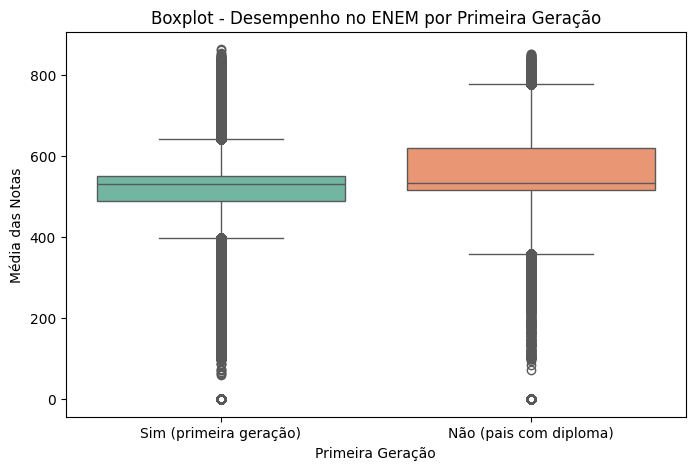

C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\985661400.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="PRIMEIRA_GERACAO", y="MEDIA_NOTAS", data=df_enem, ci="sd", palette="Set2")
C:\Users\lnata\AppData\Local\Temp\ipykernel_13116\985661400.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PRIMEIRA_GERACAO", y="MEDIA_NOTAS", data=df_enem, ci="sd", palette="Set2")


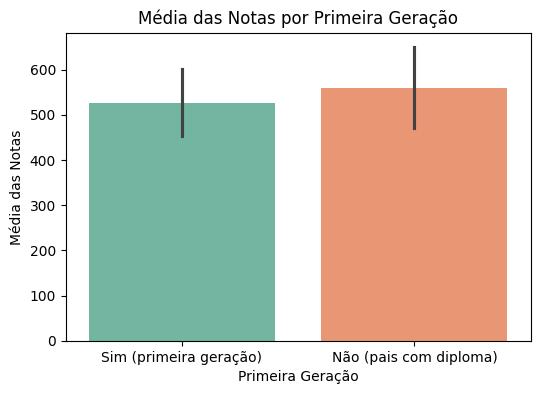

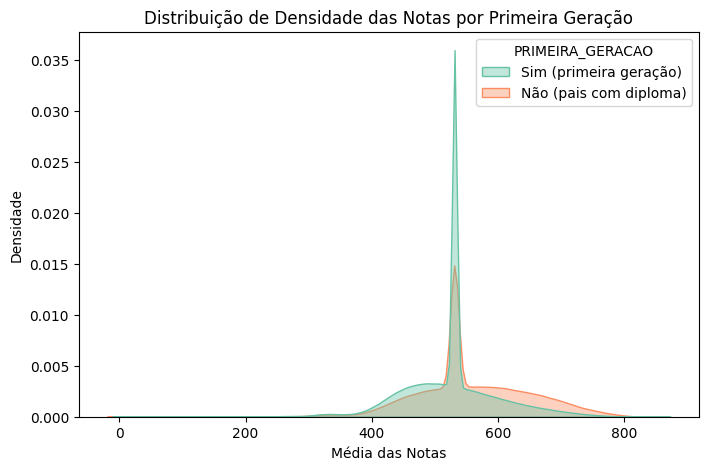

In [6]:
# 1. LIMPESA DOS DADOS
cols = [
    "NU_INSCRICAO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO",
    "Q002", "Q003"
]
df_enem = df_enem[cols]

# Calcular a média das notas
df_enem["MEDIA_NOTAS"] = df_enem[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

# Imputar valores faltantes nas notas (substituindo por média)
imputer = SimpleImputer(strategy="mean")
df_enem[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "MEDIA_NOTAS"]] = imputer.fit_transform(
    df_enem[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "MEDIA_NOTAS"]]
)

# 2. FORMULAÇÃO DA PERGUNTA

# Mapeamento de escolaridade, considerando letras e números
mapa_escolaridade = {
    # Respostas com letras
    "A": "Nunca estudou",
    "B": "Fundamental I incompleto",
    "C": "Fundamental I completo",
    "D": "Fundamental II completo",
    "E": "Médio incompleto",
    "F": "Médio completo",
    "G": "Superior incompleto",
    "H": "Superior completo",
    "I": "Pós-graduação",
    
    # Respostas com números
    "1": "Nunca estudou",
    "2": "Fundamental I incompleto",
    "3": "Fundamental I completo",
    "4": "Fundamental II completo",
    "5": "Médio incompleto",
    "6": "Médio completo",
    "7": "Superior incompleto",
    "8": "Superior completo",
    "9": "Pós-graduação"
}

df_enem["ESCOLARIDADE_PAI"] = df_enem["Q003"].map(mapa_escolaridade)  # Q003 (escolaridade do pai)
df_enem["ESCOLARIDADE_MAE"] = df_enem["Q002"].map(mapa_escolaridade)  # Q002 (escolaridade da mãe)

# Função para identificar se o estudante é da "primeira geração"
def primeira_geracao(row):
    pai = row["ESCOLARIDADE_PAI"]
    mae = row["ESCOLARIDADE_MAE"]
    if pai in ["Superior incompleto", "Superior completo", "Pós-graduação"] or \
       mae in ["Superior incompleto", "Superior completo", "Pós-graduação"]:
        return "Não (pais com diploma)"
    else:
        return "Sim (primeira geração)"

# Criar a coluna indicando se o estudante é da primeira geração
df_enem["PRIMEIRA_GERACAO"] = df_enem.apply(primeira_geracao, axis=1)

# 3. ANÁLISE E VISUALIZAÇÃO

# Estatísticas descritivas por grupo de "primeira geração"
estatisticas = df_enem.groupby("PRIMEIRA_GERACAO")["MEDIA_NOTAS"].describe()
print(estatisticas)

# Média das notas por grupo
print(df_enem.groupby("PRIMEIRA_GERACAO")["MEDIA_NOTAS"].mean())

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="PRIMEIRA_GERACAO", y="MEDIA_NOTAS", data=df_enem, palette="Set2")
plt.title("Boxplot - Desempenho no ENEM por Primeira Geração", fontsize=12)
plt.ylabel("Média das Notas")
plt.xlabel("Primeira Geração")
plt.show()


# Gráfico de barras (média por grupo)
plt.figure(figsize=(6,4))
sns.barplot(x="PRIMEIRA_GERACAO", y="MEDIA_NOTAS", data=df_enem, ci="sd", palette="Set2")
plt.title("Média das Notas por Primeira Geração", fontsize=12)
plt.ylabel("Média das Notas")
plt.xlabel("Primeira Geração")
plt.show()

# Gráfico de densidade
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_enem, x="MEDIA_NOTAS", hue="PRIMEIRA_GERACAO", fill=True, common_norm=False, palette="Set2", alpha=0.4)
plt.title("Distribuição de Densidade das Notas por Primeira Geração", fontsize=12)
plt.xlabel("Média das Notas")
plt.ylabel("Densidade")
plt.show()